# Astroplan Plotting Examples - Parallactic Angle vs Time

To generate parallactic angle vs. time plots with `Astroplan`, use the `plot_parallactic` function.  

This function takes, at minimum, a `Target`, an `Observer` and a `Time` object as input.  
Optional arguments include an `Axes` object and a style dictionary.  

`plot_parallactic` will return an `Axes` object that contains parallactic angle data for the window of time specified by the `Time` object passed in.  You can further manipulate the returned `Axes` object, or simply print the plot to your display or save it as a file. 

## Passing in a scalar `Time` object.

Any plot function in `Astroplan` with a time-based axis will allow you to pass in a scalar `Time` object (e.g., `Time('2000-1-1')`, as opposed to `Time(['2000-1-1'])` or `Time(['2001-1-1', '2001-1-2'])`).  If you do this, the plotting function will use a 24-hour window of time centered on the `Time` you passed in.  Parallactic angle will be calculated at regular intervals throughout this period.

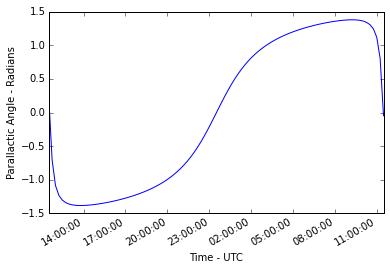

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
from pytz import timezone
from astropy.time import Time

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_parallactic

# Set up Observer, Target and observation time objects. 
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

observer = Observer(name='Subaru Telescope',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               timezone=timezone('US/Hawaii'),
               description="Subaru Telescope on Mauna Kea, Hawaii")

coordinates = SkyCoord('06h45m08.9173s', '-16d42m58.017s', frame='icrs')
target = FixedTarget(name='Sirius', coord=coordinates)

observe_time = Time('2015-06-15 23:30:00')

plot_parallactic(target, observer, observe_time)
plt.show()

## Passing in a `Time` object with multiple times.

If you want to create a `Time` object centered on a particular instant in time (such as the example above), but you want to control how many parallactic angle calculations are used, you use a non-scalar `Time` object.  For example, using `Time(['2000-1-1 20:00:00', '2000-1-1 20:00:00'])` will give you a plot based off two calculations of parallactic angle. 

To quickly create a `Time` object with many instances in time, you can use `numpy.linspace()` in conjunction with `astropy.units`.

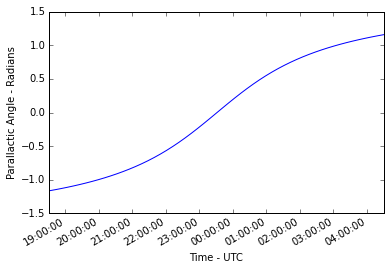

In [3]:
import numpy as np

observe_time = Time('2015-06-15 23:30:00')
observe_time = observe_time + np.linspace(-5, 5, 55)*u.hour

plot_parallactic(target, observer, observe_time)
plt.show()

If you know the start and end times of your observation run, you can use a `DeltaTime` object to populate the `Time` object.

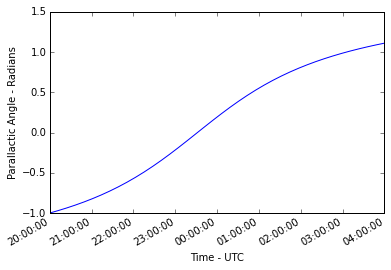

In [4]:
start_time = Time('2015-06-15 20:00:00')
end_time = Time('2015-06-16 04:00:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 40)

plot_parallactic(target, observer, observe_time)
plt.show()

## Plotting parallactic angle for multiple targets.

You may want to plot parallactic angle information for multiple targets. 

In this case, you simply reissue the `plot_parallactic` command, using a different `Target` object as input this time.  Repeat until you have as many targets on the plot as you wish and save to a file if you like.  When you're ready to make a different plot, use `ax.cla()` to clear the `Axes` object.

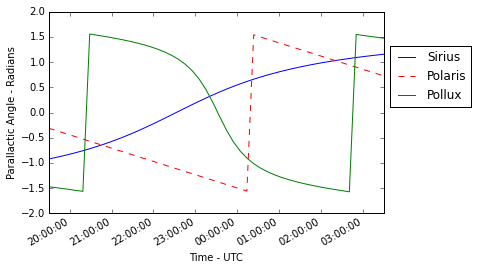

In [5]:
coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
other_target = FixedTarget(name='Polaris', coord=coordinates)

coordinates = SkyCoord('07h45m19.4s', '+28d01m35s', frame='icrs')
third_target = FixedTarget(name='Pollux', coord=coordinates)

observe_time = Time('2015-06-30 23:30:00') + np.linspace(-4.0, 4.0, 50)*u.hour

sirius_styles = {'linestyle': '--', 'color': 'r'}
pollux_styles = {'linestyle': '-', 'color': 'g'}

plot_parallactic(target, observer, observe_time)
plot_parallactic(other_target, observer, observe_time, style_kwargs=sirius_styles)
plot_parallactic(third_target, observer, observe_time, style_kwargs=pollux_styles)

plt.legend(loc=3, bbox_to_anchor=(1, 0.5))
plt.show()

## Changing style options.

You can change the `linestyle` and `color` properties of any data set by setting the `style_kwargs` option. See [Plotting parallactic angles for multiple targets](#Plotting-parallactic-angle-for-multiple-targets.) above.